# Lab session: Tree-Based Methods 

### Objective

1. Understand how the Tree-Based Methods works.

2. Implement the different algorithms.

3. Evaluate the performance of models and compare.


**Tree-based methods** are a class of supervised learning algorithms that use a tree like model of decisions. These methods are used for both classification  and regression and based on a divide approach, splitting the dataset into smaller subsets recursively.



### Key Idea Behind Tree-Based Methods
The idea is to partition the dataset into regions where the response variable is as homogeneous as possible. This is achieved by:

1. **Splitting** the data based on conditions (e.g., $ x \leq t $ where $ t $ is a threshold).

2. Repeating the splitting recursively until a stopping condition is met.

3. Assigning a prediction (class label or mean value) to the regions created.



### How Does a Decision Tree Decide Where to Split?

1. Iterate Over All Features:

   - The algorithm examines each feature in the dataset.

   - For each feature, it evaluates all possible thresholds or categories (for numerical or categorical features, respectively).

2. Evaluate Each Split:

   - For numerical features: It tries splitting at every unique value of the feature.

   - For categorical features: It considers separating groups of categories.

3. Compute a Splitting Criterion:
   - The algorithm calculates a **metric** to measure how good each split is. Common metrics include:

     - **Gini Index** (used in classification):
       $$
       G = 1 - \sum_{k=1}^K p_k^2
       $$
      $ p_k $ is the proportion of samples of class $ k $ in a node.

     - **Entropy** (used in classification):
      $$
       H = -\sum_{k=1}^K p_k \log(p_k)
       $$
       Lower Gini or entropy means a purer split.
       
     - **Mean Squared Error (MSE)** (used in regression):
       $$
       MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \bar{y})^2
       $$
       Minimizing MSE creates better splits for regression.

4. Select the Best Split:
   - After evaluating all splits, the algorithm chooses the one that maximizes purity (or minimizes error) according to the selected criterion.
   
   - If multiple splits are equally good, one may be chosen randomly, but this is rare.

Let's perform a **recursive split manually** based on **Feature \(X_1\)**.


| ID  | Feature \(X_1\) | Feature \(X_2\) | Class \(y\) |
|:---:|:---------------:|:---------------:|:-----------:|
|  1  |        2        |        3        |      A      |
|  2  |        4        |        1        |      A      |
|  3  |        6        |        5        |      B      |
|  4  |        8        |        7        |      B      |
|  5  |       10        |        9        |      B      |

We will split the data only by **$X_1$**. The values of $X_1$ are $[2, 4, 6, 8, 10]$.

The possible split points are midpoints between consecutive values:
- $ \text{Split 1}: X_1 \leq 3 $
- $ \text{Split 2}: X_1 \leq 5 $
- $ \text{Split 3}: X_1 \leq 7 $
- $ \text{Split 4}: X_1 \leq 9 $

We calculate the **Gini Index** for each split to choose the best one.










### Tree-Based Methods in Practice
Tree-based methods include:

1. **Decision Trees**:
   - Simple and interpretable.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create a DataFrame
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
iris_df.shape

(150, 5)

#### Classification tree

0.9777777777777777


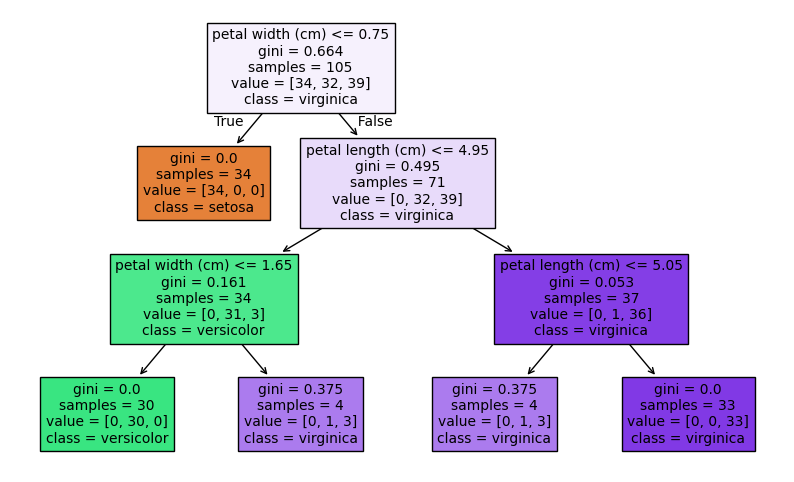

In [3]:

# Load dataset
X, y = iris.data, iris.target

# Split data
# TO DO
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit Classification Tree
# Use the DecisionTreeClassifier from sklearn. Its components are: criterion, 
# max_depht (parameter defines the maximum number of levels the tree can have) and random_state
#TO DO
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X_train, y_train)
# Predictions and Evaluation (Accuracy computation)
print(accuracy_score(y_test, model.predict(X_test)))
# Visualize the Tree
#replace model by the name of your model
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


## **Tasks for classification tree**:

1. Modify the tree by using the `entropy` criterion.

2. Test the effect of maximum depth on the accuracy of the tree.

0.9777777777777777


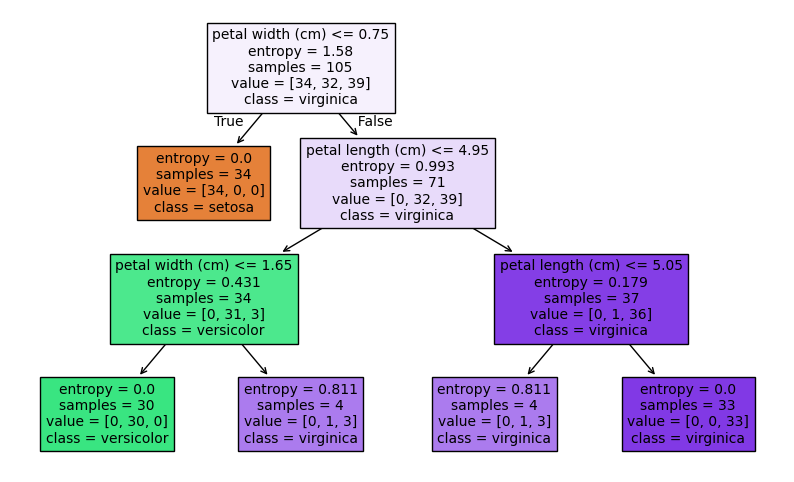

In [4]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

#### Observation:
Entropy doesn't change the tree in our case.

In [5]:
for i in range(1,10):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    print(f"Accuracy (max_depth={i}): {accuracy_score(y_test, model.predict(X_test))}")

Accuracy (max_depth=1): 0.6
Accuracy (max_depth=2): 0.9111111111111111
Accuracy (max_depth=3): 0.9777777777777777
Accuracy (max_depth=4): 0.9777777777777777
Accuracy (max_depth=5): 0.9777777777777777
Accuracy (max_depth=6): 0.9777777777777777
Accuracy (max_depth=7): 0.9777777777777777
Accuracy (max_depth=8): 0.9777777777777777
Accuracy (max_depth=9): 0.9777777777777777


#### Observation:
We see that the accuracy increases at the start and then when the depth reach 3 the accuracy is maxed out.

#### Regression tree

- Trees split data to minimize the error

- The terminal node represents the average value of the responses in that region.

MSE : 0.23395037375050692


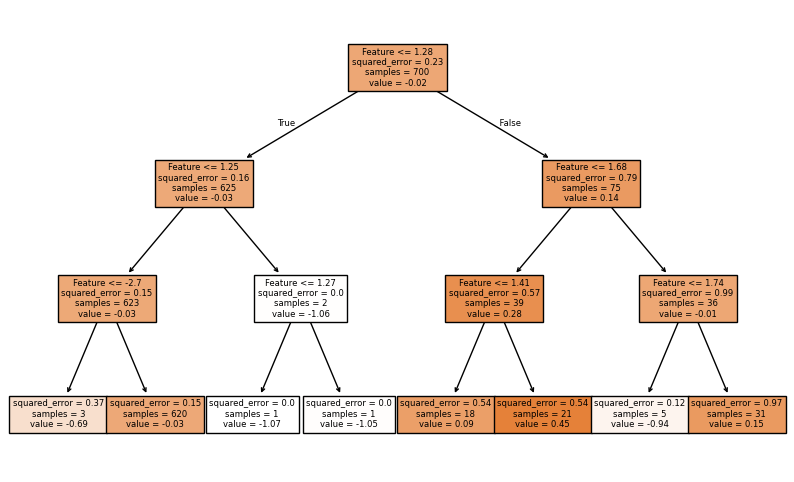

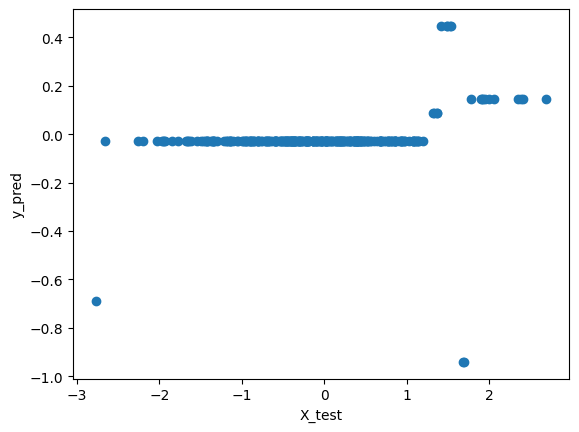

In [6]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(0)
# Generate synthetic regression data of 100 data points with 1 feature and 
#1 column for target
# TO DO
X = np.random.randn(1000, 1)
y = np.random.randn(1000, 1) * 0.5 * X
# Split data
# TO DO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Fit Regression Tree USING DecisionTreeRegressor with max_depth and random_state as components
# TO DO
model = DecisionTreeRegressor(max_depth=3, random_state=0)
model.fit(X_train, y_train)
# Predictions and Evaluation ( error)
# TO DO
y_pred = model.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
# Visualize the Tree
#replace model by the name of your model
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['Feature'], precision=2)
plt.show()
# You can Plot predictions using plt.scatter for (X_test, y_test) and 
# (X_test, y_pred)
# TO DO
plt.scatter(X_test, y_pred)
plt.xlabel("X_test")
plt.ylabel("y_pred")
plt.show()



## **Tasks for regression tree**:

1. Try different depths for the tree and observe the effect on MSE.

2. Generate new synthetic data (1000 points) and repeat the analysis.

In [7]:
for depth in range(1,100):
    model = DecisionTreeRegressor(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"MSE (for depth={depth}) : {mean_squared_error(y_test, y_pred)}")

MSE (for depth=1) : 0.24526490070623244
MSE (for depth=2) : 0.24244275720234132
MSE (for depth=3) : 0.23395037375050692
MSE (for depth=4) : 0.22632144504694834
MSE (for depth=5) : 0.23328045810081274
MSE (for depth=6) : 0.2210050410188226
MSE (for depth=7) : 0.2484990416630607
MSE (for depth=8) : 0.23817423802014778
MSE (for depth=9) : 0.23520230839229167
MSE (for depth=10) : 0.25210483273147855
MSE (for depth=11) : 0.2594420231064316
MSE (for depth=12) : 0.2697639586933245
MSE (for depth=13) : 0.27100255644900934
MSE (for depth=14) : 0.2723455577113932
MSE (for depth=15) : 0.2826049844417371
MSE (for depth=16) : 0.29820281289297623
MSE (for depth=17) : 0.3040071293138143
MSE (for depth=18) : 0.2999487556281322
MSE (for depth=19) : 0.2985369871927882
MSE (for depth=20) : 0.3049183925281873
MSE (for depth=21) : 0.30901516863452677
MSE (for depth=22) : 0.3103512032963056
MSE (for depth=23) : 0.31219657735593015
MSE (for depth=24) : 0.31278477831441476
MSE (for depth=25) : 0.3138193215902

#### Observation
We observe that the MSE increase with the depth until we reach 66 of depth. (Maybe it still increases but slightly). 

MSE : 0.2742041326605324


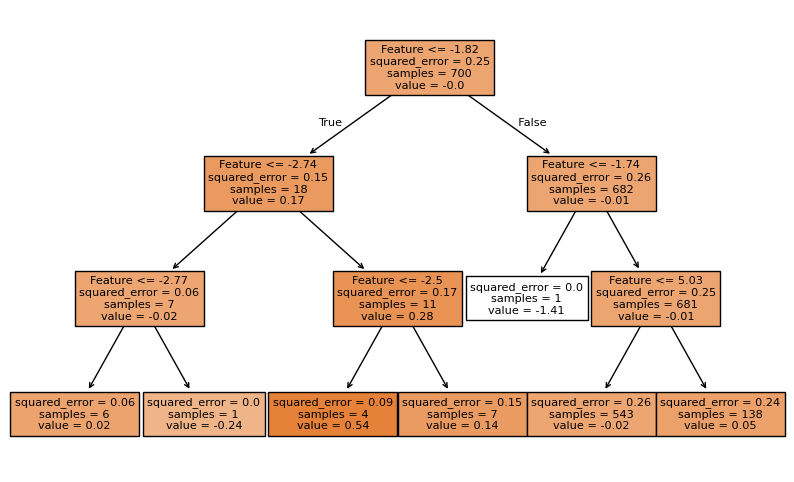

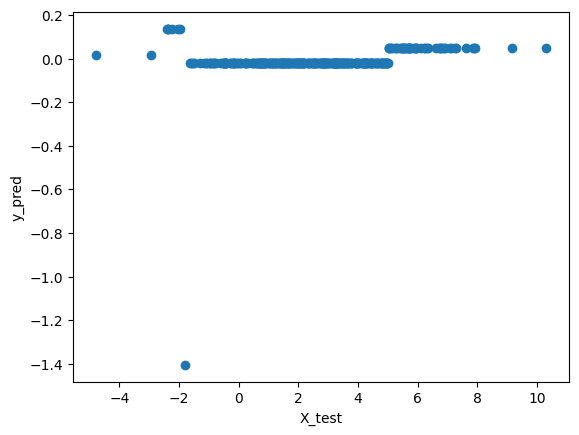

In [8]:
X = 3 + 2.5 * np.random.randn(1000, 1)
y = np.random.randn(1000, 1) * 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = DecisionTreeRegressor(max_depth=3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['Feature'], precision=2)
plt.show()
plt.scatter(X_test, y_pred)
plt.xlabel("X_test")
plt.ylabel("y_pred")
plt.show()

In [9]:
for depth in range(1,100):
    model = DecisionTreeRegressor(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"MSE (for depth={depth}) : {mean_squared_error(y_test, y_pred)}")

MSE (for depth=1) : 0.2695031201232805
MSE (for depth=2) : 0.27631425224867145
MSE (for depth=3) : 0.2742041326605324
MSE (for depth=4) : 0.27976272372085137
MSE (for depth=5) : 0.29181033426113173
MSE (for depth=6) : 0.3048439389283836
MSE (for depth=7) : 0.3088686321590627
MSE (for depth=8) : 0.30585708741343476
MSE (for depth=9) : 0.3227767461839096
MSE (for depth=10) : 0.3336212204285742
MSE (for depth=11) : 0.35235047167557826
MSE (for depth=12) : 0.35708895579861527
MSE (for depth=13) : 0.39177881160154376
MSE (for depth=14) : 0.4065253979921384
MSE (for depth=15) : 0.4175515632760573
MSE (for depth=16) : 0.42213913616916926
MSE (for depth=17) : 0.42311597983823895
MSE (for depth=18) : 0.43295188057421463
MSE (for depth=19) : 0.4354760276579188
MSE (for depth=20) : 0.4469979045677968
MSE (for depth=21) : 0.45282950623442164
MSE (for depth=22) : 0.45834746532598436
MSE (for depth=23) : 0.46458847888006516
MSE (for depth=24) : 0.46497889799383996
MSE (for depth=25) : 0.466995509620

#### Observation
We can see the same phenomena but this time MSE reaches a maximum at depth 

2. **Bagging and Random Forests**:

   - Combine multiple trees for better predictions.

   - introduces randomness by choosing by selecting a random subset of features for splitting.

- For classification: Majority vote.

- For regression: Average.

So think of a random forest as a "forest" made up of many "trees" (decision trees). Each tree makes its own prediction, and the forest combines these predictions (e.g., by majority voting for classification or averaging for regression).



In [10]:
from sklearn.ensemble import RandomForestClassifier

# Example Dataset
data = {
    'Age': [25, 30, 35, 40, 45, 50, 25, 30, 35, 40],
    'Income': ['Low', '!Medium', 'Medium', 'High', 'High', 'Low',
               'Medium', 'High', 'High', 'Low'],
    'Loan Approved': [0, 0, 1, 1, 1, 0, 0, 0, 1, 1]  # 0 = No, 1 = Yes
}
df = pd.DataFrame(data)
df


,Age,Income,Loan Approved
0,25,Low,0
1,30,!Medium,0
2,35,Medium,1
3,40,High,1
4,45,High,1
5,50,Low,0
6,25,Medium,0
7,30,High,0
8,35,High,1
9,40,Low,1


In [11]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Income'], drop_first=True)

In [12]:
X = df.drop(columns=['Loan Approved'])
y = df['Loan Approved']

In [13]:
# Split data
#TO DO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
# Train Random Forest using RandomForestClassifier for sklearn with components:
# n_estimators(number of trees), max_features='sqrt', and random_state
#TO DO
model = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=0)
model.fit(X_train, y_train)
# Predict and Evaluate (Accuracy)
#TO DO
y_pred = model.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Accuracy : 0.4


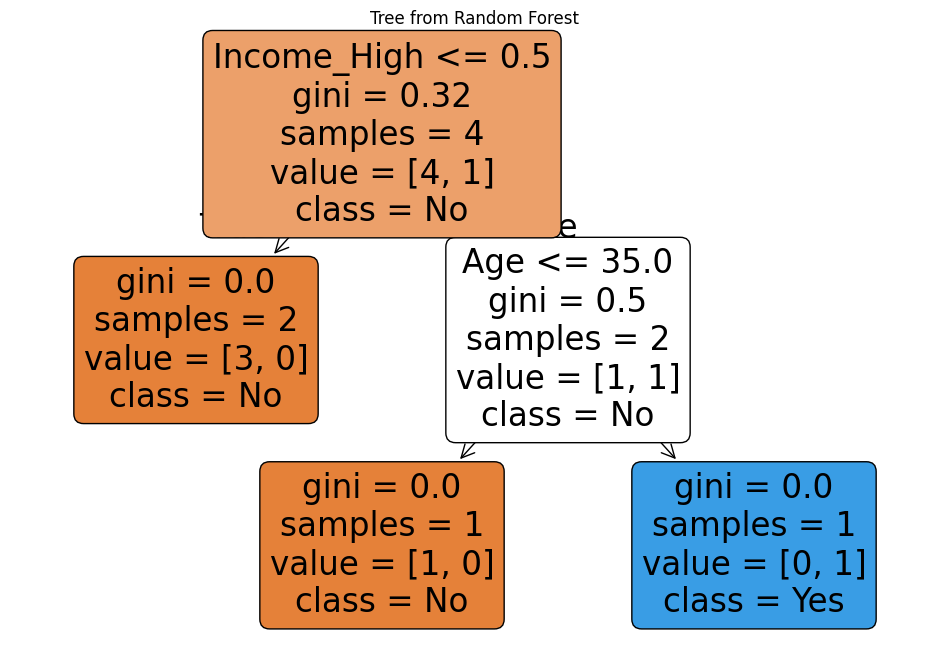

In [14]:
# Extract a single tree from the forest
#replace model by the name of your model
single_tree = model.estimators_[2]  # Get one tree

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(single_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Tree from Random Forest")
plt.show()

## **Tasks for random forest**:

1. Compare results with a single decision tree.

2. Vary the number of estimators and max features and compare accuracy.

In [15]:
single_tree = model.estimators_[1]  # Get one tree
y_pred_single_tree = single_tree.predict(X_test)
print(f"Random Forest accuracy score : {accuracy_score(y_test, y_pred)}\n\
Single Decision Tree accuracy socre: {accuracy_score(y_test, y_pred_single_tree)}")

Random Forest accuracy score : 0.4
Single Decision Tree accuracy socre: 0.2


/Users/borito/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [16]:
for i in range(1, 4):
    print(f"----------- Max features = {i} -------------")
    for j in range(1, 20):
        model = RandomForestClassifier(n_estimators=j, max_features=i, random_state=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Accuracy (n_estimators={j}, max_features={i}) : {accuracy_score(y_test, y_pred)}")

----------- Max features = 1 -------------
Accuracy (n_estimators=1, max_features=1) : 0.8
Accuracy (n_estimators=2, max_features=1) : 0.2
Accuracy (n_estimators=3, max_features=1) : 0.4
Accuracy (n_estimators=4, max_features=1) : 0.2
Accuracy (n_estimators=5, max_features=1) : 0.2
Accuracy (n_estimators=6, max_features=1) : 0.2
Accuracy (n_estimators=7, max_features=1) : 0.4
Accuracy (n_estimators=8, max_features=1) : 0.4
Accuracy (n_estimators=9, max_features=1) : 0.4
Accuracy (n_estimators=10, max_features=1) : 0.4
Accuracy (n_estimators=11, max_features=1) : 0.4
Accuracy (n_estimators=12, max_features=1) : 0.4
Accuracy (n_estimators=13, max_features=1) : 0.4
Accuracy (n_estimators=14, max_features=1) : 0.4
Accuracy (n_estimators=15, max_features=1) : 0.4
Accuracy (n_estimators=16, max_features=1) : 0.4
Accuracy (n_estimators=17, max_features=1) : 0.4
Accuracy (n_estimators=18, max_features=1) : 0.4
Accuracy (n_estimators=19, max_features=1) : 0.4
----------- Max features = 2 ------

#### Observation
We can see the same trends for max_features=1,2,3 when we change n_estimators. At the start we get the max accuracy at n_estimators = 1 and max_features=1,2. Probably beacause the dataset is small.

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Train the random forest for regression using the data points you 
# generate previously. print the MSE
# TO DO

X = 3 + 2.5 * np.random.randn(1000, 1)
y = np.random.randn(1000, 1) * 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestRegressor(n_estimators=10, max_features='sqrt', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")

MSE : 0.34098566882250336


/Users/borito/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


3. **Boosting for Classification and Regression**

   -  Boosting trains sequential models where each model corrects the errors of its predecessor. Final predictions are weighted sums.
   
    - Weighted error  of a weak learner $m$

    $$
    e_m = \sum_{i=1}^N w_i \cdot \mathbb{1}(y_i \neq \hat{y}_i^{(m)})
    $$

    - A weak learner is typically a simple model, such as a decision stump (a decision tree with only one split). Each weak learner focuses on improving the performance by correcting the mistakes made by the previous ones.

In [26]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor

# AdaBoost for Classification
# Use the previous dataset to train AdaBoostClassifier and evaluate
# TO DO
X = df.drop(columns=['Loan Approved'])
y = df['Loan Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
Ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
Ada.fit(X_train, y_train)
y_pred = Ada.predict(X_test)
print(f"AdaBoost Accuracy : {accuracy_score(y_test, y_pred)}")

# Gradient Boosting for Regression
# Generate a data for regression using GradientBoostingRegressor. Components 
# are n_estimators, learning_rate, random_state
# Print the MSE
# TO DO
X = 3 + 2.5 * np.random.randn(1000, 1)
y = np.random.randn(1000, 1) * 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = GradientBoostingRegressor(n_estimators=10, learning_rate=0.01, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Gradient Boosting MSE : {mean_squared_error(y_test, y_pred)}")


AdaBoost Accuracy : 0.4
Gradient Boosting MSE : 0.23891270195050482


/Users/borito/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/borito/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


## **Tasks**:

1. Compare AdaBoost with Random Forest.

2. Experiment with learning rates in Gradient Boosting.

In [19]:
X = df.drop(columns=['Loan Approved'])
y = df['Loan Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Ada = AdaBoostClassifier(n_estimators=10, learning_rate=0.1, random_state=0)
Ada.fit(X_train, y_train.to_numpy())
y_pred = Ada.predict(X_test)
print(f"AdaBoost Accuracy : {accuracy_score(y_test, y_pred)}")

RF = RandomForestClassifier(n_estimators=1, max_features=1, random_state=0)
RF.fit(X_train, y_train.to_numpy())
y_pred_RF = RF.predict(X_test)
print(f"RandomForest Accuracy : {accuracy_score(y_test, y_pred_RF)}")


AdaBoost Accuracy : 0.4
RandomForest Accuracy : 0.8


/Users/borito/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### Observation for task 1
We observe that Random Forest Accuracy is higher than AdaBoost.

In [20]:
X = 3 + 2.5 * np.random.randn(1000, 1)
y = np.random.randn(1000,) * 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

learning_rates = np.arange(0.001, 1, 0.005)
mses = np.zeros(len(learning_rates))
for i in range(len(learning_rates)):
    model = GradientBoostingRegressor(n_estimators=10, learning_rate=learning_rates[i], random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mses[i] = mean_squared_error(y_test, y_pred)
    print(f"Gradient Boosting MSE (lr = {learning_rates[i]:.2f}) : {mean_squared_error(y_test, y_pred)}")
best_index = np.argmin(mses)
print(f"Best MSE : {mses[best_index]} at a learning rate of {learning_rates[best_index]}")

Gradient Boosting MSE (lr = 0.00) : 0.25238065386654446
Gradient Boosting MSE (lr = 0.01) : 0.2526430821985138
Gradient Boosting MSE (lr = 0.01) : 0.25286837819182456
Gradient Boosting MSE (lr = 0.02) : 0.2530396187333487
Gradient Boosting MSE (lr = 0.02) : 0.25326811644158664
Gradient Boosting MSE (lr = 0.03) : 0.25316840195037166
Gradient Boosting MSE (lr = 0.03) : 0.253499603093784
Gradient Boosting MSE (lr = 0.04) : 0.25348329108124024
Gradient Boosting MSE (lr = 0.04) : 0.253639522346706
Gradient Boosting MSE (lr = 0.05) : 0.25393531914025386
Gradient Boosting MSE (lr = 0.05) : 0.2540140515206551
Gradient Boosting MSE (lr = 0.06) : 0.25362141433668256
Gradient Boosting MSE (lr = 0.06) : 0.254163856507292
Gradient Boosting MSE (lr = 0.07) : 0.2543772936798677
Gradient Boosting MSE (lr = 0.07) : 0.254666997566749
Gradient Boosting MSE (lr = 0.08) : 0.2549041097811631
Gradient Boosting MSE (lr = 0.08) : 0.2550125853472602
Gradient Boosting MSE (lr = 0.09) : 0.2552167384499554
Gradien

# **Final Task**:

Consider the data you generated for the previous assignment ( data of your project):

1. Perform classification or regression using all methods.

2. Compare their performance metrics.
   

In [61]:
from sklearn.metrics import log_loss
from GenerativeModel import ComplexDependentSatisfaction
np.random.seed(1)
gen = ComplexDependentSatisfaction(1000)
X = gen.df.drop(columns=["Satisfaction"])
y = gen.df["Satisfaction"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tryhout_lenght = 10
lr_multiplier = tryhout_lenght / (tryhout_lenght * 10)

decision_tree_acc = np.zeros(tryhout_lenght)
random_forest_acc = np.zeros(tryhout_lenght)
ada_boost_acc = np.zeros(tryhout_lenght)

decision_tree_log_loss = np.zeros(tryhout_lenght)
random_forest_log_loss = np.zeros(tryhout_lenght)
ada_boost_log_loss = np.zeros(tryhout_lenght)


for i in range(1, tryhout_lenght + 1):
    decision_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    random_forest_clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=i, random_state=0)
    ada_boost_clf = AdaBoostClassifier(n_estimators=100, learning_rate=i * lr_multiplier, algorithm='SAMME', random_state=0)
    
    decision_tree_clf.fit(X_train, y_train)
    random_forest_clf.fit(X_train, y_train)
    ada_boost_clf.fit(X_train, y_train)
    
    decision_tree_y_pred = decision_tree_clf.predict(X_test)
    random_forest_y_pred = random_forest_clf.predict(X_test)
    ada_boost_y_pred = ada_boost_clf.predict(X_test)
    
    decision_tree_y_proba = decision_tree_clf.predict_proba(X_test)
    random_forest_y_proba = random_forest_clf.predict_proba(X_test)
    ada_boost_y_proba = ada_boost_clf.predict_proba(X_test)

    decision_tree_acc[i - 1] = accuracy_score(y_test, decision_tree_y_pred)
    random_forest_acc[i - 1] = accuracy_score(y_test, random_forest_y_pred)
    ada_boost_acc[i - 1] = accuracy_score(y_test, ada_boost_y_pred)
    
    decision_tree_log_loss[i - 1] = log_loss(y_test, decision_tree_y_proba)
    random_forest_log_loss[i - 1] = log_loss(y_test, random_forest_y_proba)
    ada_boost_log_loss[i - 1] = log_loss(y_test, ada_boost_y_proba)

best_dt_index = np.argmax(decision_tree_acc)
best_rf_index = np.argmax(random_forest_acc)
best_ada_index = np.argmax(ada_boost_acc)

print(f"best accuracy for Decision Tree Classifier : {decision_tree_acc[best_dt_index]}")
print(f"best accuracy for Random Forest Classifier : {random_forest_acc[best_rf_index]}")
print(f"best accuracy for Ada Boost Classifier : {ada_boost_acc[best_ada_index]}")

best accuracy for Decision Tree Classifier : 0.9933333333333333
best accuracy for Random Forest Classifier : 0.9966666666666667
best accuracy for Ada Boost Classifier : 0.9733333333333334


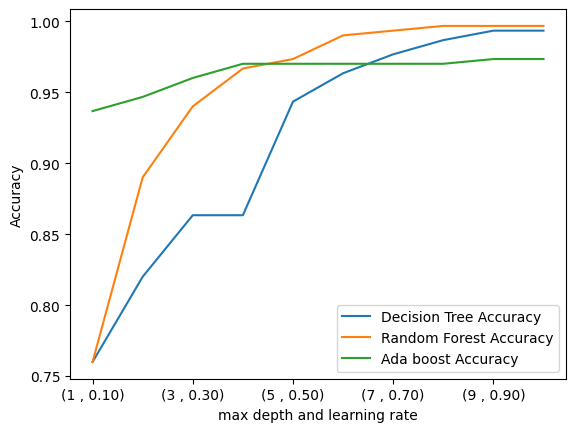

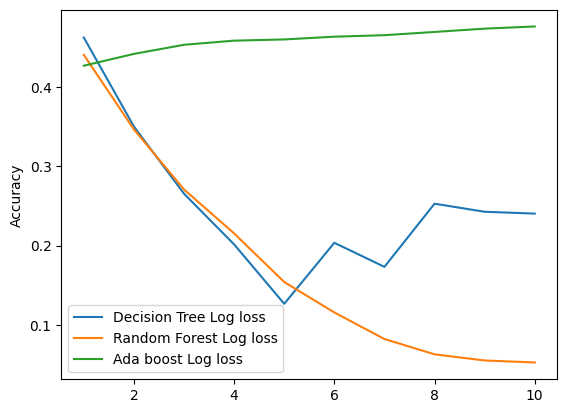

In [79]:
x_axis = np.arange(1, tryhout_lenght + 1, 1)
x_axis_l = np.arange(1, tryhout_lenght + 1, 2)


plt.plot(x_axis, decision_tree_acc)
plt.plot(x_axis, random_forest_acc)
plt.plot(x_axis, ada_boost_acc)

plt.xticks(ticks=x_axis_l, labels=[f"({i} , {i*lr_multiplier:.2f})" for i in x_axis_l])
plt.legend(["Decision Tree Accuracy", "Random Forest Accuracy", "Ada boost Accuracy"])
plt.xlabel("max depth and learning rate")
plt.ylabel("Accuracy")
plt.show()

plt.plot(x_axis, decision_tree_log_loss)
plt.plot(x_axis, random_forest_log_loss)
plt.plot(x_axis, ada_boost_log_loss)
plt.ylabel("Accuracy")
plt.legend(["Decision Tree Log loss", "Random Forest Log loss", "Ada boost Log loss"])
plt.show()

#### Observation
Overall for this lab Random Forest seems to outperform the two other classification models. For the data in our project Random Forest seems to be a good fit for the prediction of the satisfaction level of a customer based on price, punctuality. duration and overcrowding. 